In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sodapy import Socrata

# df=pd.read_csv('Project/Data/Casos_positivos_de_COVID-19_en_Colombia.csv',sep=',',encoding='utf-8',chunksize=10000)
# for chunk in df:
#client = Socrata("www.datos.gov.co", None)
#results = client.get("gt2j-8ykr", where='fecha_reporte_web.year == "2021"',limit=100000)
#result=pd.DataFrame.from_records(results)

## Documentación:
#https://dev.socrata.com/foundry/www.datos.gov.co/gt2j-8ykr

#https://www.datos.gov.co/resource/gt2j-8ykr.json?$select=COUNT(fecha_reporte_web),departamento&$where=fecha_reporte_web%20like%20%27%252021%25%27&$group=departamento
#https://www.datos.gov.co/resource/gt2j-8ykr.json?$select=COUNT(fecha_reporte_web),ciudad_municipio&$where=fecha_reporte_web%20like%20%27%252021%25%27&$group=ciudad_municipio
#https://www.datos.gov.co/resource/gt2j-8ykr.json?$select=COUNT(fecha_reporte_web)&$where=ciudad_municipio=5001%20AND%20fecha_reporte_web%20like%20%27%252021%25%27

In [ ]:
import requests as req
year=2021
url=f'https://www.datos.gov.co/resource/gt2j-8ykr.json?$select=COUNT(fecha_reporte_web),ciudad_municipio&$where=fecha_reporte_web%20like%20%27%25{year}%25%27&$group=ciudad_municipio'
res = req.get(url)
json=res.json()
len(json)


1000

In [ ]:
def contagios_mun_year():
    years=[2020,2021,2022]
    months=[f'-0{x}'for x in range (1,10)]
    months+=[f'-{x}'for x in range(10,13)]
    dict_mun=[]
    for year in years:
        for month in months: 
            url=f'https://www.datos.gov.co/resource/gt2j-8ykr.json?$select=COUNT(fecha_reporte_web),ciudad_municipio&$where=fecha_reporte_web%20like%20%27%25{year}{month}%25%27&$group=ciudad_municipio'
            res=req.get(url)
            list_json=res.json()
            for element in list_json:
                element['year']=year
                month_c=int(month[-2::])
                element['month']=month_c
                element['date']=f'{year}{month}'
                dict_mun.append(element)
    return dict_mun
dict_year_mun=contagios_mun_year()


In [ ]:
dict_year_mun[-5:]

[{'COUNT_fecha_reporte_web': '1',
  'ciudad_municipio': '95001',
  'year': 2022,
  'month': 5,
  'date': '2022-05'},
 {'COUNT_fecha_reporte_web': '4',
  'ciudad_municipio': '97001',
  'year': 2022,
  'month': 5,
  'date': '2022-05'},
 {'COUNT_fecha_reporte_web': '1',
  'ciudad_municipio': '97161',
  'year': 2022,
  'month': 5,
  'date': '2022-05'},
 {'COUNT_fecha_reporte_web': '1',
  'ciudad_municipio': '99001',
  'year': 2022,
  'month': 5,
  'date': '2022-05'},
 {'COUNT_fecha_reporte_web': '1',
  'ciudad_municipio': '99773',
  'year': 2022,
  'month': 5,
  'date': '2022-05'}]

In [ ]:
df=pd.DataFrame.from_records(dict_year_mun)
df['count']=df['COUNT_fecha_reporte_web'].astype(int)
df.drop('COUNT_fecha_reporte_web',axis=1,inplace=True)
df.rename(columns={'ciudad_municipio':'municipio'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21282 entries, 0 to 21281
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   municipio  21282 non-null  object
 1   year       21282 non-null  int64 
 2   month      21282 non-null  int64 
 3   date       21282 non-null  object
 4   count      21282 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 831.5+ KB


<AxesSubplot:title={'center':'Positive COVID cases Colombia for town'}, xlabel='Town code', ylabel='Count'>

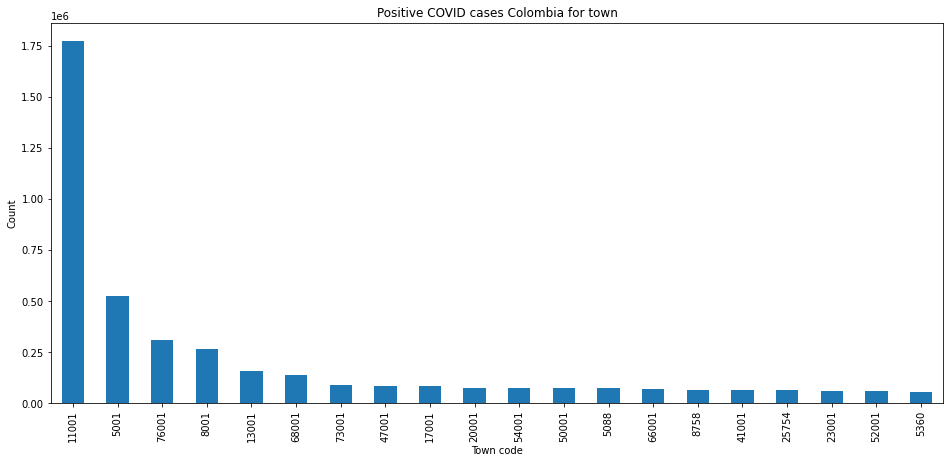

In [ ]:
mun_total=df[['municipio','count']].groupby(by='municipio').sum().sort_values('count',ascending=False).head(20)
mun_total.plot.bar(figsize=(16,7),title="Positive COVID cases Colombia for town",xlabel="Town code",ylabel="Count",legend=False)

In [ ]:
print(df['count'].sum())
df.head()

5903993


,municipio,year,month,date,count
0,5001,2020,3,2020-03,62
1,5045,2020,3,2020-03,1
2,5088,2020,3,2020-03,6
3,5120,2020,3,2020-03,1
4,5266,2020,3,2020-03,10


In [ ]:
df['date_p']=pd.to_datetime(df['date'],format="%Y-%m")
df['month_p']=df['date_p'].dt.to_period('M')


In [ ]:
monthly_possitives=df[['month_p','count']].groupby(by="month_p").sum()
print(monthly_possitives.sum())
monthly_possitives

count    5903993
dtype: int64


,count
month_p,
2020-03,905
2020-04,5560
2020-05,22917
2020-06,68471
2020-07,197663
2020-08,319661
2020-09,214510
2020-10,244235
2020-11,242115


<AxesSubplot:title={'center':'Positive COVID cases Colombia'}, xlabel='Date', ylabel='Count'>

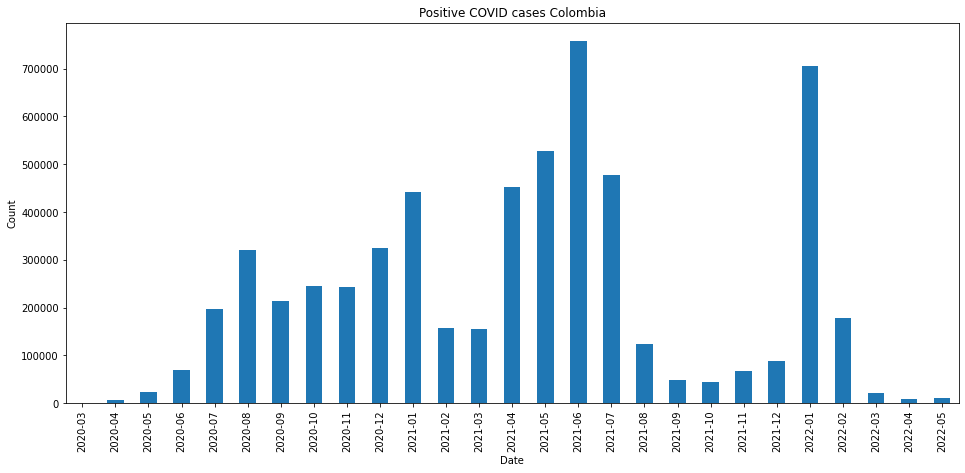

In [ ]:
monthly_possitives.plot.bar(figsize=(16,7),title="Positive COVID cases Colombia",xlabel="Date",ylabel="Count",legend=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=70a6331b-3e37-4c4d-8041-2d29d0ba96c1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>